# WQCC Introduction to Quantum Mechanics and Solutions to the Schrodinger Equation-Interactive Workshop
4/18/2024

Welcome to the WQCC intro to quantum workshop! In this guided Jupyter notebook, we will walk you though plotting solutions to the Schrodinger Equation. This will help you visualize and develop your intuition for some of the things we talked about last meeting. 

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
from numpy import linalg as LA

## Section 1: 1D Particle in an Infinite Potential Well

Recall from last time that stationary state solutions for a 1D particle in a box are of the form $$\phi_n(x) = \sqrt{\frac{2}{L}}\sin\left(\frac{n\pi x}{L}\right), \ n = 1, 2, 3, ...$$

### Part a
Choose a value for L, and plot stationary state solutions for n=1 below. This is the ground state of the system, meaning it is the state with the lowest allowed energy. 

Text(0.5, 1.0, 'n=1')

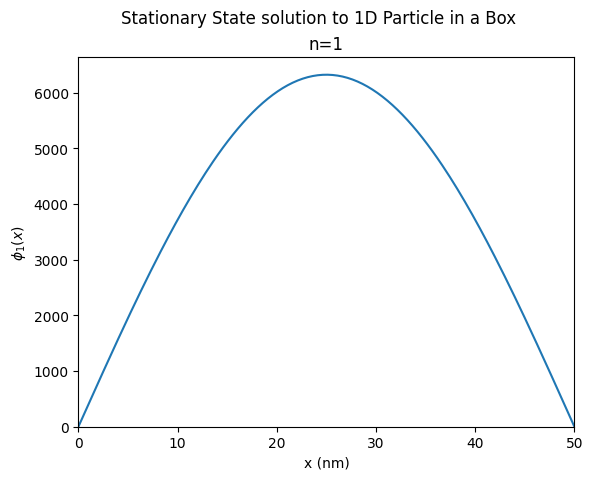

In [157]:
L = 50e-9 # nm
x = np.linspace(0, L, 200)
n = 1
phi = np.sqrt(2/L)*np.sin((n*np.pi*x)/L)

plt.plot(x*1e9, phi)
plt.xlabel("x (nm)")
plt.ylabel("$\phi_1(x)$")

plt.xlim(0, 50)
plt.ylim(bottom = 0)
plt.suptitle("Stationary State solution to 1D Particle in a Box")
plt.title("n=1")

Now plot the probability distribution as a function of x, for the same n and L. Recall that from a wavefunction $\Psi$, we can find the probability as $$|\Psi|^2 = \Psi^*\Psi$$
How do the two differ?

Text(0.5, 1.0, 'n=1')

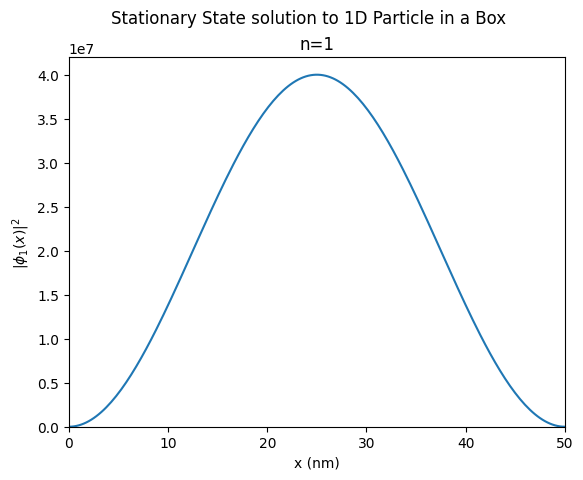

In [158]:
prob = phi*phi
plt.plot(x*1e9, prob)
plt.xlabel("x (nm)")
plt.ylabel("$|\phi_1(x)|^2$")


plt.xlim(0, 50)
plt.ylim(bottom = 0)
plt.suptitle("Stationary State solution to 1D Particle in a Box")
plt.title("n=1")

### Part b
Now plot both $\phi_n(x)$ and $|\phi_n(x)|^2$ for the same value of L, but n=2. Again, what chages when going from $\phi_n(x)$ to $|\phi_n(x)|^2$?  Hint: Pay close attention to the scale of the y-axis. 

Text(0.5, 1.0, 'n=2')

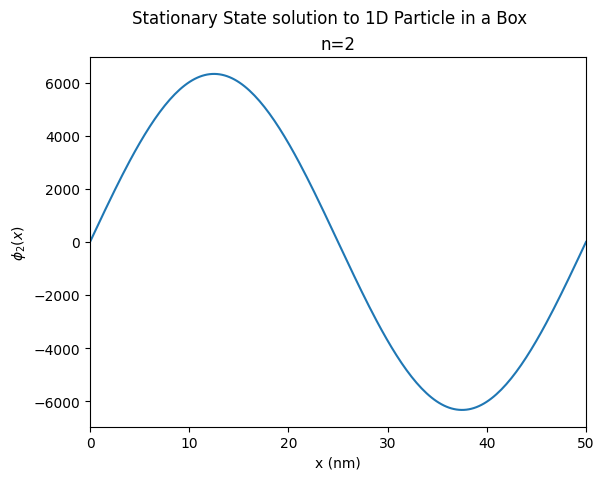

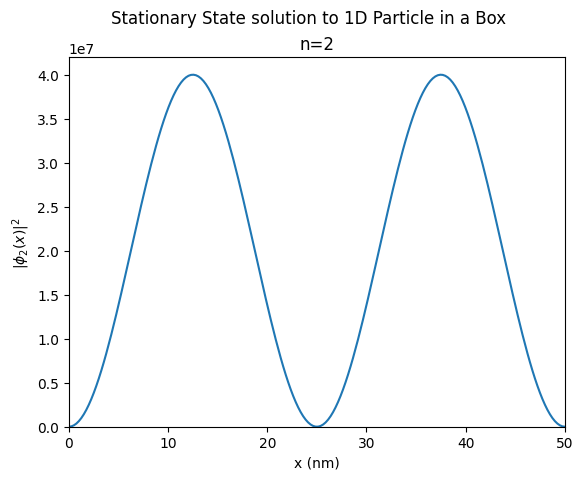

In [159]:
L = 50e-9 # nm
x = np.linspace(0, L, 200)
n = 2
phi = np.sqrt(2/L)*np.sin((n*np.pi*x)/L)

plt.plot(x*1e9, phi)
plt.xlabel("x (nm)")
plt.ylabel("$\phi_2(x)$")

plt.xlim(0, 50)
# plt.ylim(bottom = 0)
plt.suptitle("Stationary State solution to 1D Particle in a Box")
plt.title("n=2")

plt.figure()
prob = phi*phi
plt.plot(x*1e9, prob)
plt.xlabel("x (nm)")
plt.ylabel("$|\phi_2(x)|^2$")


plt.xlim(0, 50)
plt.ylim(bottom = 0)
plt.suptitle("Stationary State solution to 1D Particle in a Box")
plt.title("n=2")

### Part c
Now lets look at n=5. Do you start to notice any patterns about how the probability distribution depends on n?

Text(0.5, 1.0, 'n=5')

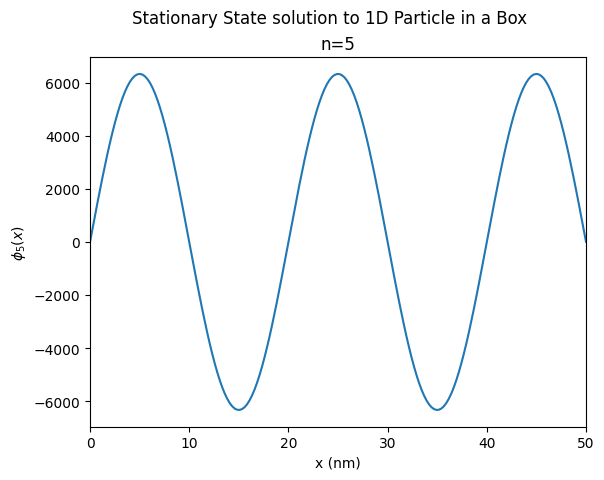

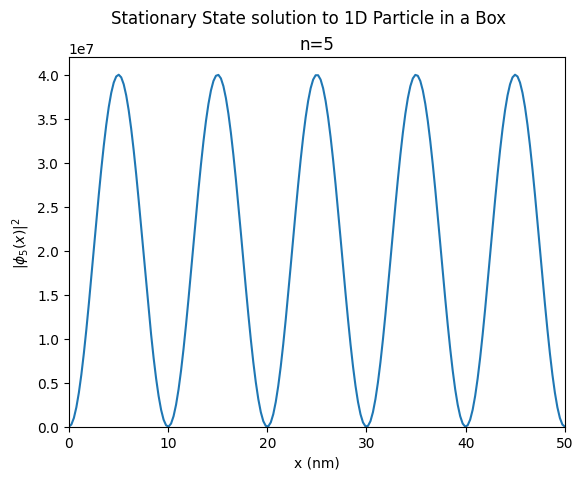

In [160]:
L = 50e-9 # nm
x = np.linspace(0, L, 200)
n = 5
phi = np.sqrt(2/L)*np.sin((n*np.pi*x)/L)

plt.plot(x*1e9, phi)
plt.xlabel("x (nm)")
plt.ylabel("$\phi_5(x)$")

plt.xlim(0, 50)
# plt.ylim(bottom = 0)
plt.suptitle("Stationary State solution to 1D Particle in a Box")
plt.title("n=5")

plt.figure()
prob = phi*phi
plt.plot(x*1e9, prob)
plt.xlabel("x (nm)")
plt.ylabel("$|\phi_5(x)|^2$")


plt.xlim(0, 50)
plt.ylim(bottom = 0)
plt.suptitle("Stationary State solution to 1D Particle in a Box")
plt.title("n=5")

To help make this more clear, lets plot the probability distribution for n=1, through n=9 on the same figure, using subplots. 

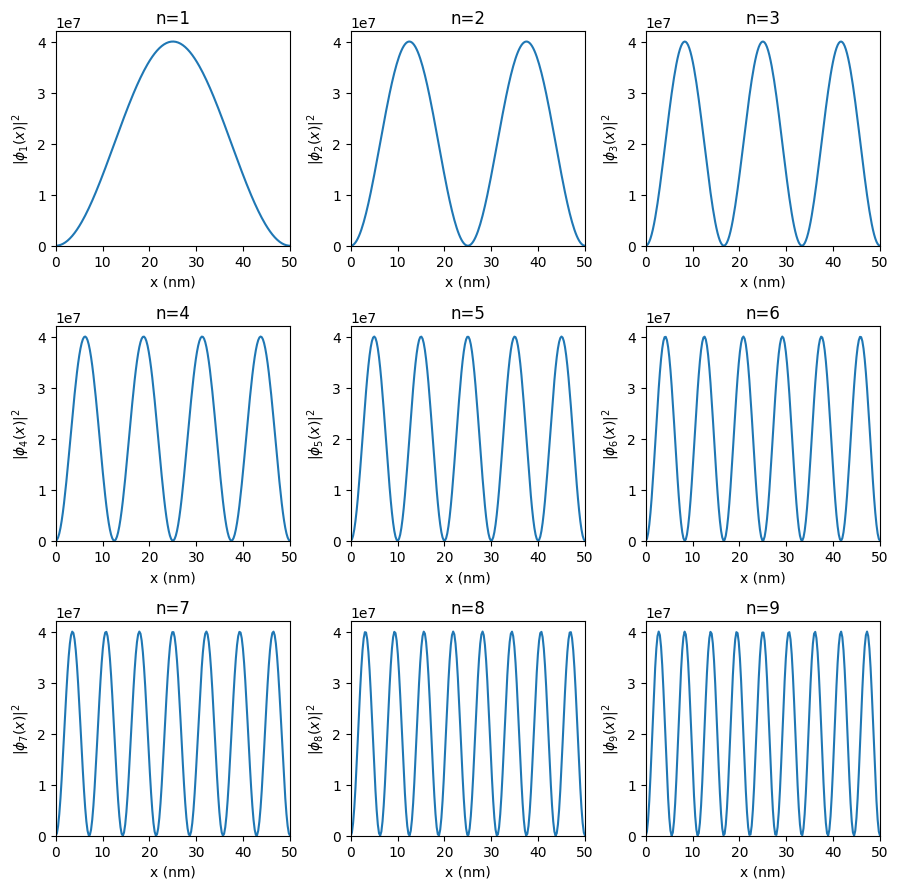

In [161]:
ns = np.vstack((np.linspace(1, 3, 3), np.linspace(4, 6, 3), np.linspace(7, 9, 3)))
x = np.linspace(0, L, 200)

fig, axes = plt.subplots(3, 3, figsize=(9, 9))

for i in range(3):
    for j in range(3):
        ax = axes[i, j]
        n = ns[i, j]
        phi = np.sqrt(2/L)*np.sin((n*np.pi*x)/L)
        prob = phi**2
        ax.plot(x*1e9, prob)
        ax.set_xlim(0, 50)
        ax.set_ylim(bottom = 0)
        ax.set_title(f"n={int(n)}")
        ax.set_xlabel("x (nm)")
        ax.set_ylabel(f"$|\phi_{int(n)}(x)|^2$")

plt.tight_layout()


If you go and count how many "peaks" are in each box, you will see that it matches n! These are called standing waves, and are a feature of confined waves. The points where the probability is 0 (meaning the particle is forbidden to be thre) are called nodes. 

### Part d
Next lets investigate how changing L affects our solutions. First, plot $\phi_1(x)$ (n=1) for two different L on the same plot. What do you notice?

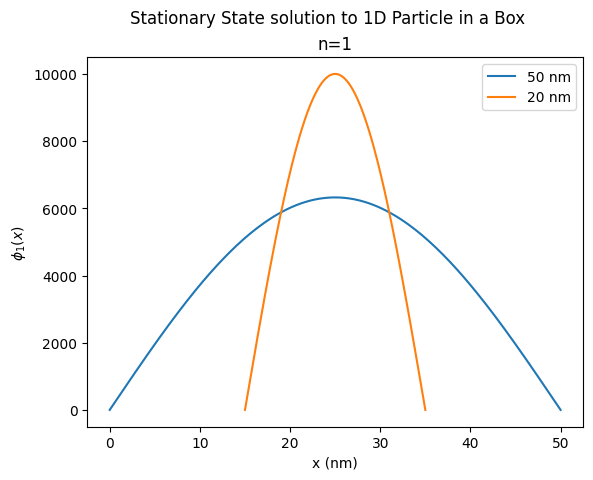

In [162]:
L = 50e-9 # nm
x = np.linspace(0, L, 200)
n = 1
phi = np.sqrt(2/L)*np.sin((n*np.pi*x)/L)

plt.figure()
plt.plot(x*1e9, phi, label = "50 nm")
plt.xlabel("x (nm)")
plt.ylabel("$\phi_1(x)$")

# plt.xlim(0, 50)
# plt.ylim(bottom = 0)
plt.suptitle("Stationary State solution to 1D Particle in a Box")
plt.title("n=1")

L = 20e-9 # nm
x = np.linspace(0, L, 200)
x = x
phi = np.sqrt(2/L)*np.sin((n*np.pi*(x))/L)
plt.plot(x*1e9 + 15, phi, label = "20 nm")
plt.legend()


Now lets explore how this changes our energies. Recall that the energies of a 1D particle in a box are given by 
$$E_n = \frac{\hbar^2}{2m}\left(\frac{n\pi}{L}\right)^2, \ n = 1, 2, 3...$$

First, plot how energy depends on n. Recall that energies inbetween two different ns are forbidden, so use plt.step instead of plt.plot. 

([<matplotlib.axis.XTick at 0x1db107c8ed0>,
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12'),
  Text(14.0, 0, '14'),
  Text(16.0, 0, '16'),
  Text(18.0, 0, '18'),
  Text(20.0, 0, '20')])

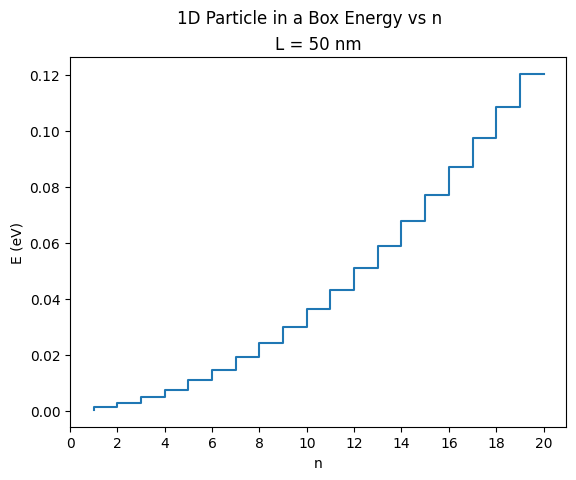

In [163]:
hbar = sp.constants.hbar #J s
e = sp.constants.e
me = sp.constants.m_e
L = 50e-9

ns = np.linspace(1, 20, 20)
En = (hbar**2/me)*((ns*np.pi)/L)**2
En = En/e #Convert to eV

plt.step(ns, En)
plt.suptitle("1D Particle in a Box Energy vs n")
plt.title("L = 50 nm")
plt.xlabel("n")
plt.ylabel("E (eV)")
plt.xticks(np.linspace(0, 20, 11))

This plot makes it clear that energy increases proportional to $n^2$. But what about L? Remake this plot, but now overlay the same plot for a different, significantly smaller L. 

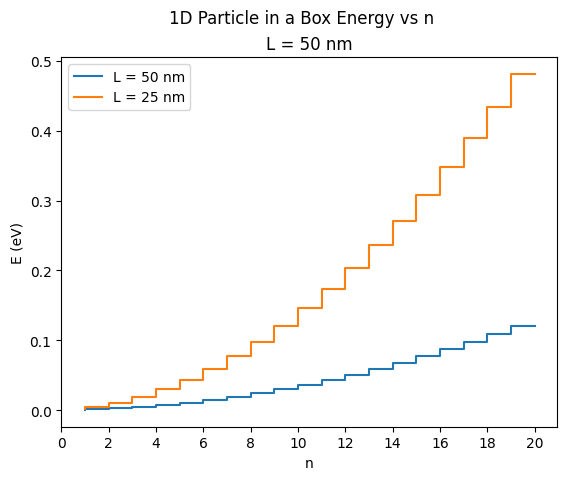

In [164]:
hbar = sp.constants.hbar #J s
e = sp.constants.e
me = sp.constants.m_e
L = 50e-9

ns = np.linspace(1, 20, 20)
En = (hbar**2/me)*((ns*np.pi)/L)**2
En = En/e #Convert to eV

plt.step(ns, En, label = "L = 50 nm")


L = 25e-9
ns = np.linspace(1, 20, 20)
En = (hbar**2/me)*((ns*np.pi)/L)**2
En = En/e #Convert to eV

plt.step(ns, En, label = "L = 25 nm")

plt.suptitle("1D Particle in a Box Energy vs n")
plt.title("L = 50 nm")
plt.xlabel("n")
plt.ylabel("E (eV)")
plt.xticks(np.linspace(0, 20, 11))
plt.legend()

Finally, lets put all of our findings together onto one plot. Make 2 subplots right next to each other. Plot the probability distribution for n=1, n=2, n=3, & n=4 in each plot. Add the energy of the state as a constant to your wavefunctions, so that your y-axis is a hybrid of probability and energy. The goal is to space the curves out by energy level. Do this for both the left and the right, but for different L's. 

(0.0, 65.0)

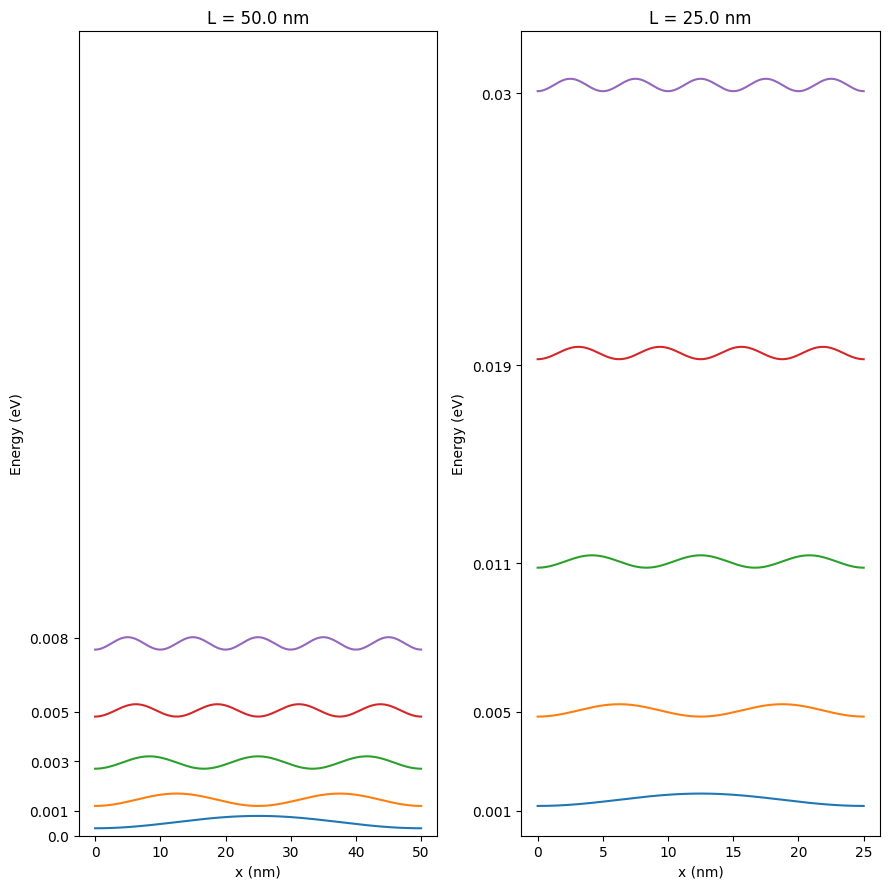

In [165]:
fig, axes = plt.subplots(1, 2, figsize=(9, 9))
ns = [1, 2, 3, 4, 5]
hbar = sp.constants.hbar #J s
e = sp.constants.e
me = sp.constants.m_e
scale = 2000
L = 50e-9
x = np.linspace(0, L, 200)
ax = axes[0]
Energies1 = np.zeros(5)
for n in ns:
    phi = np.sqrt(2/L)*np.sin((n*np.pi*x)/L)
    prob = phi**2
    prob = prob/max(prob)
    En = (hbar**2/me)*((n*np.pi)/L)**2
    En = En/e #Convert to eV
    Energies1[n-1] = round(En, 3)
    ax.plot(x*1e9, prob+scale*En)
    ax.set_yticks(scale*Energies1, labels = Energies1)
    ax.set_ylabel("Energy (eV)")
    ax.set_xlabel("x (nm)")
    ax.set_title(f"L = {L*1e9} nm")



L = 25e-9
x = np.linspace(0, L, 200)
ax = axes[1]
Energies2 = np.zeros(5)
for n in ns:
    phi = np.sqrt(2/L)*np.sin((n*np.pi*x)/L)
    prob = phi**2
    prob = prob/max(prob)
    En = (hbar**2/me)*((n*np.pi)/L)**2
    En = En/e #Convert to eV
    Energies2[n-1] = round(En, 3)
    ax.plot(x*1e9, prob+scale*En)
    ax.set_ylim(0, 65)
    ax.set_yticks(scale*Energies2, labels = Energies2)
    ax.set_ylabel("Energy (eV)")
    ax.set_xlabel("x (nm)")
    ax.set_title(f"L = {L*1e9} nm")




plt.tight_layout()
y_min = min(min(Energies1), min(Energies2))
y_max = max(max(Energies1), max(Energies2))
axes[0].set_ylim(y_min, y_max*scale+5)
axes[1].set_ylim(y_min, y_max*scale+5)


## Section 2- 2D Particle in an Infinite Potential Well
Now that we have a greater understanding of a 1D particle in a box, lets start moving to higher dimensions. Recall for 2D, stationary state solutions have the form 
$$\phi_{n_x, n_y}(x, y) = \sqrt{\frac{2^2}{L_X^2+L_y^2}}\sin\left(\frac{n_x \pi x}{L_x}\right)\sin\left(\frac{n_y \pi y}{L_y}\right)$$

Lets start out simple. Plot both $\phi_{n_x, n_y}$ and $|\phi_{n_x, n_y}|^2$ for $n_x=n_y=1$ and $L_x = L_y$

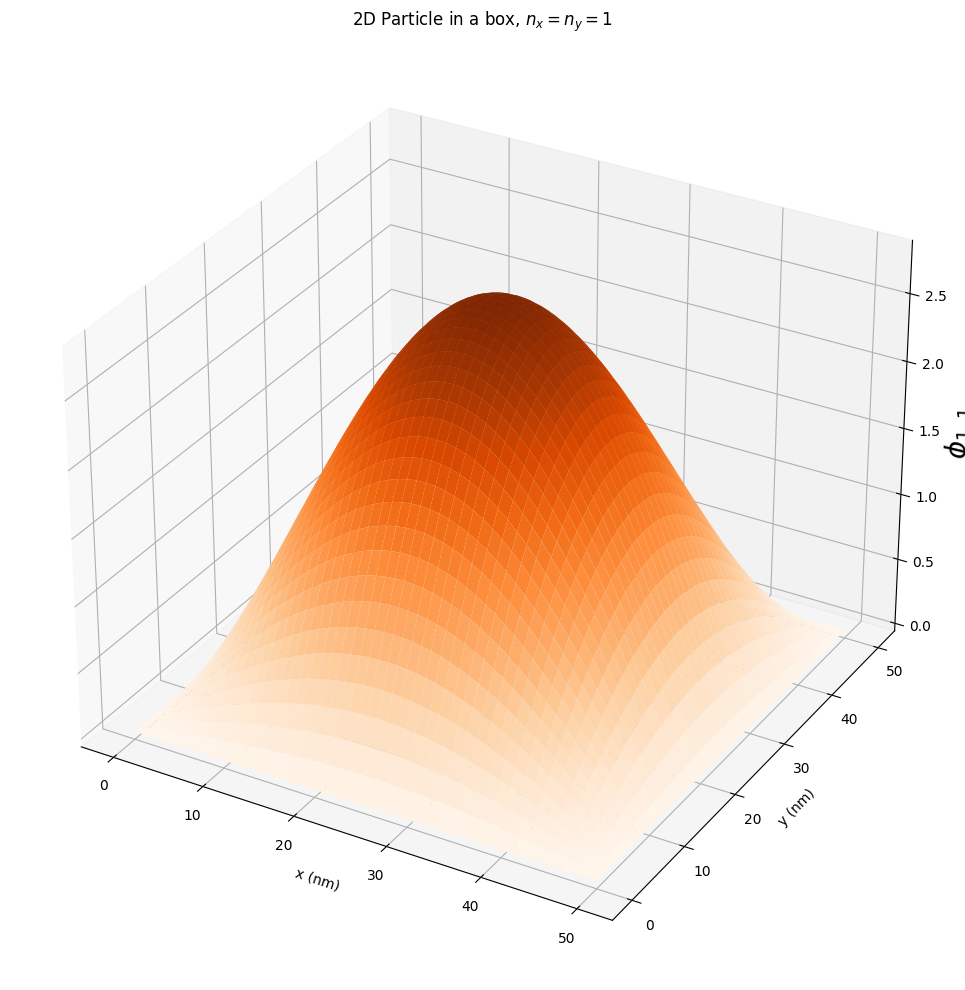

In [166]:
L_x = 50e-9
n_x = 1

L_y = 50e-9
n_y = 1
x = np.linspace(0, L_x, 200)
y = np.linspace(0, L_y, 200)
x, y = np.meshgrid(x, y)

phi = np.sqrt(4/(L_x**2+L_y**2))*np.sin((n_x*np.pi*x)/L_x)*np.sin((n_y*np.pi*y)/L_y)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x*1e9, y*1e9, phi, cmap = "Oranges")
ax.set_title("2D Particle in a box, $n_x=n_y=1$")
ax.set_xlabel("x (nm)")
ax.set_ylabel("y (nm)")
ax.set_zlabel("$\phi_{1, 1}$", fontsize = 20)
ax.figure.tight_layout()



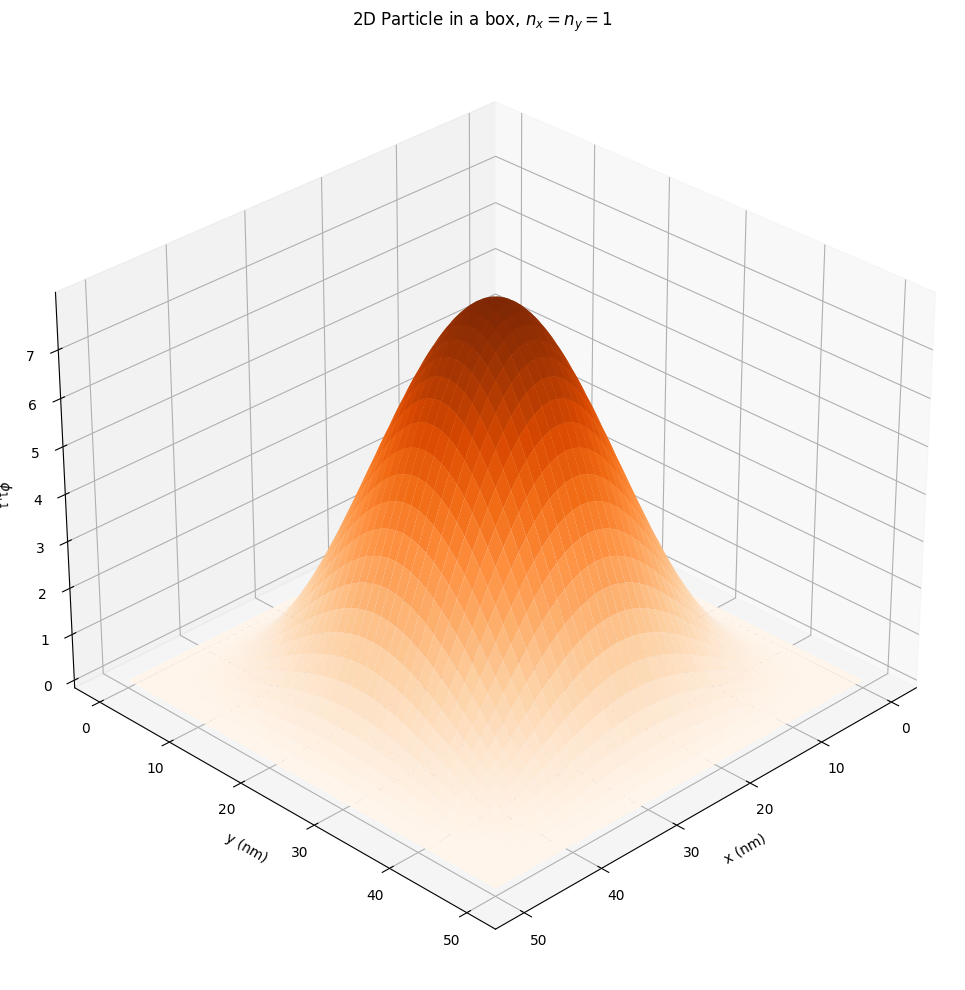

In [167]:
L_x = 50e-9
n_x = 1

L_y = 50e-9
n_y = 1
x = np.linspace(0, L_x, 200)
y = np.linspace(0, L_y, 200)
x, y = np.meshgrid(x, y)

phi = np.sqrt(4/(L_x**2+L_y**2))*np.sin((n_x*np.pi*x)/L_x)*np.sin((n_y*np.pi*y)/L_y)
prob = phi**2

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x*1e9, y*1e9, prob, cmap = "Oranges")
ax.set_title("2D Particle in a box, $n_x=n_y=1$")
ax.set_xlabel("x (nm)")
ax.set_ylabel("y (nm)")
ax.set_zlabel("$\phi_{1, 1}$")
ax.figure.tight_layout()

#You can play around with this to look at it from different angles
ax.view_init(30, 45)


Not lets start playing around with n. Create another grid of plots, 4x4. Organize according to the n matrix below, where each point is denoted as $(n_x, n_y)$. Make a grid for both $\phi_{n_x, n_y}$ and $|\phi_{n_x, n_y}|^2$. Keep $L_x$ and $L_y$ the same for now. 
$$\begin{bmatrix} (1, 1) & (1, 2) & (1, 3) & (1, 4) \\ 
(2, 1) & (2, 2) & (2, 3) & (2, 4) \\
(3, 1) & (2, 2) & (3, 3) & (3, 4) \\
(4, 1) & (2, 2) & (4, 3) & (4, 4) \\ \end{bmatrix}$$

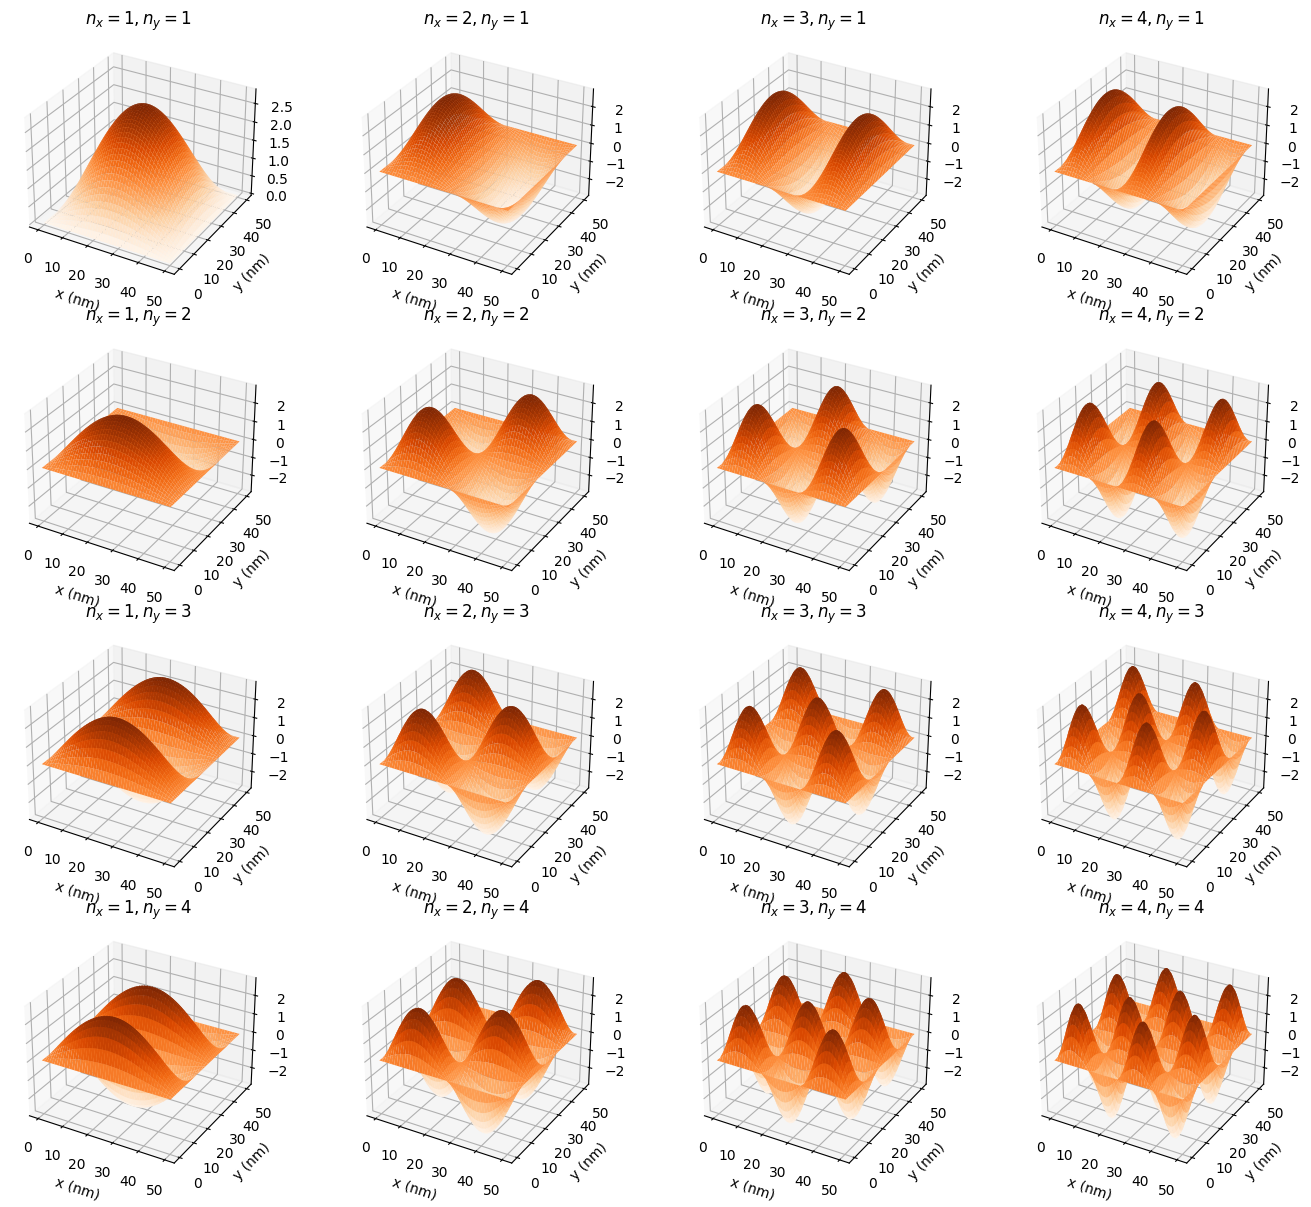

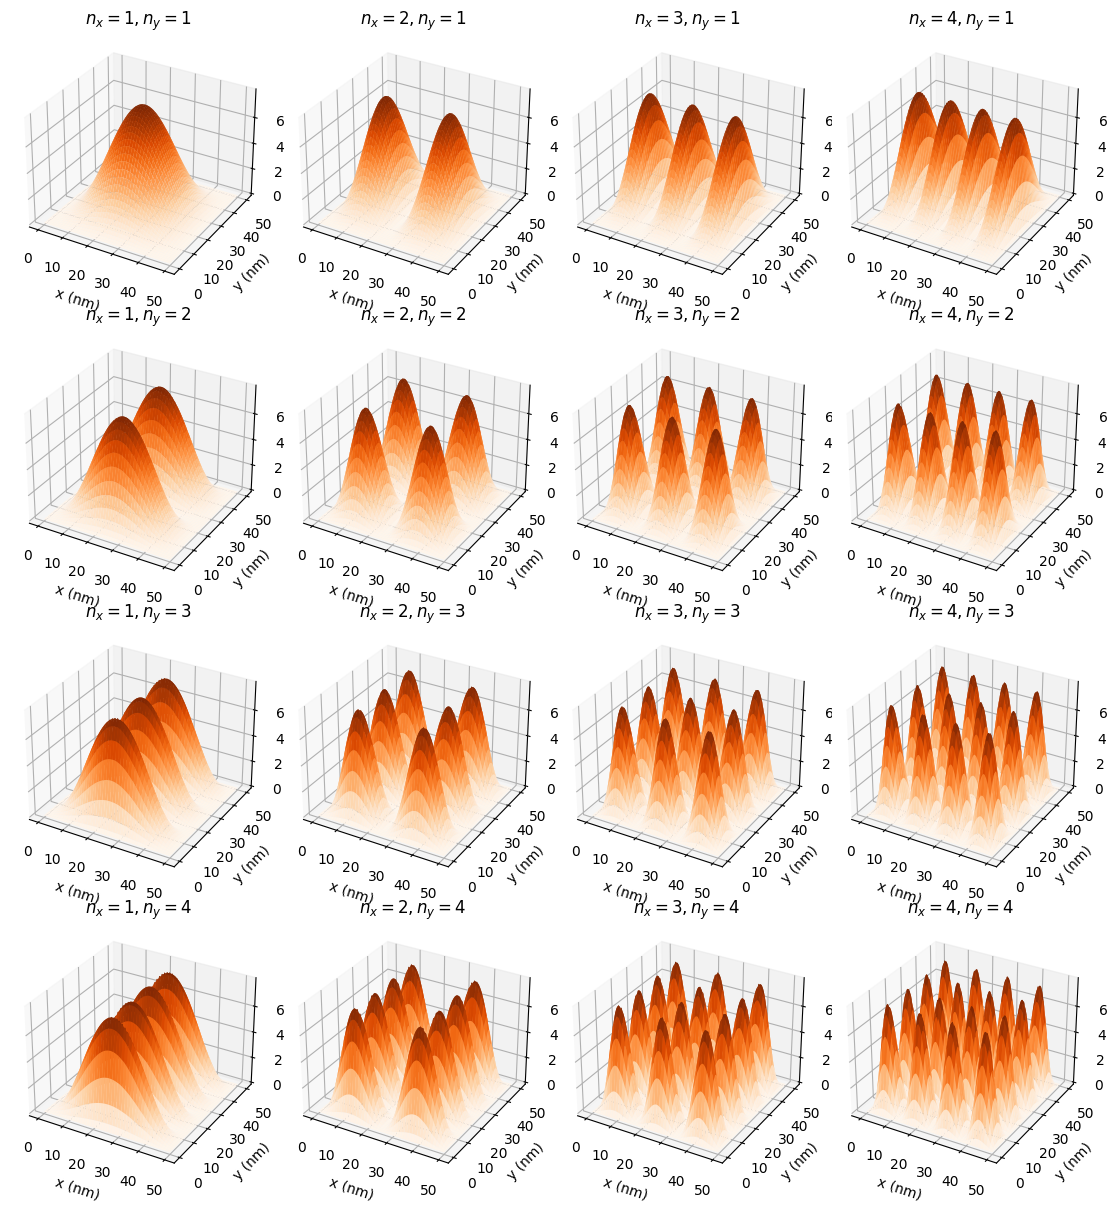

In [168]:
fig, axs = plt.subplots(nrows=4, ncols=4, subplot_kw={'projection': '3d'}, figsize=(14, 12))

#Generate ns
ns = np.zeros((4, 4, 2))
for i in range(4):
    for j in range(4):
        ns[i, j, 0] = i+1
        ns[i, j, 1] = j+1


L_x = 50e-9
n_x = 1

L_y = 50e-9
n_y = 1
x = np.linspace(0, L_x, 200)
y = np.linspace(0, L_y, 200)
x, y = np.meshgrid(x, y)


for i in range(4):
    for j in range(4):
        n_y = i+1
        n_x = j+1
        ax = axs[i, j]
        phi = np.sqrt(4/(L_x**2+L_y**2))*np.sin((n_x*np.pi*x)/L_x)*np.sin((n_y*np.pi*y)/L_y)
        ax.plot_surface(x*1e9, y*1e9, phi, cmap = "Oranges")
        ax.set_title(f"$n_x={n_x}, n_y={n_y}$")
        ax.set_xlabel("x (nm)")
        ax.set_ylabel("y (nm)")
        # ax.set_zlabel("$\phi_{1, 1}$", fontsize = 20)
ax.figure.tight_layout()

fig, axs = plt.subplots(nrows=4, ncols=4, subplot_kw={'projection': '3d'}, figsize=(14, 12))
for i in range(4):
    for j in range(4):
        n_y = i+1
        n_x = j+1
        ax = axs[i, j]
        phi = np.sqrt(4/(L_x**2+L_y**2))*np.sin((n_x*np.pi*x)/L_x)*np.sin((n_y*np.pi*y)/L_y)
        ax.plot_surface(x*1e9, y*1e9, phi**2, cmap = "Oranges")
        ax.set_title(f"$n_x={n_x}, n_y={n_y}$")
        ax.set_xlabel("x (nm)")
        ax.set_ylabel("y (nm)")
        ax.figure.tight_layout()

So just like with the one dimensional case, n controls how many "peaks" we see along a given direction. So for the $n_x=n_y=4$, we get 16 peaks. 

Next, play around with L so that the particle is no longer confined to a symmetric box, i.e. change $L_x$ and $L_y$ such that $L_x\ne L_y$. You can choose the ns to be whatever you want, but something like $n_x = 3, n_y = 4$ might help you see the effect more clearly. However, when you plot the function make sure your x and y scales are the same so that you are still plotting over a square. 

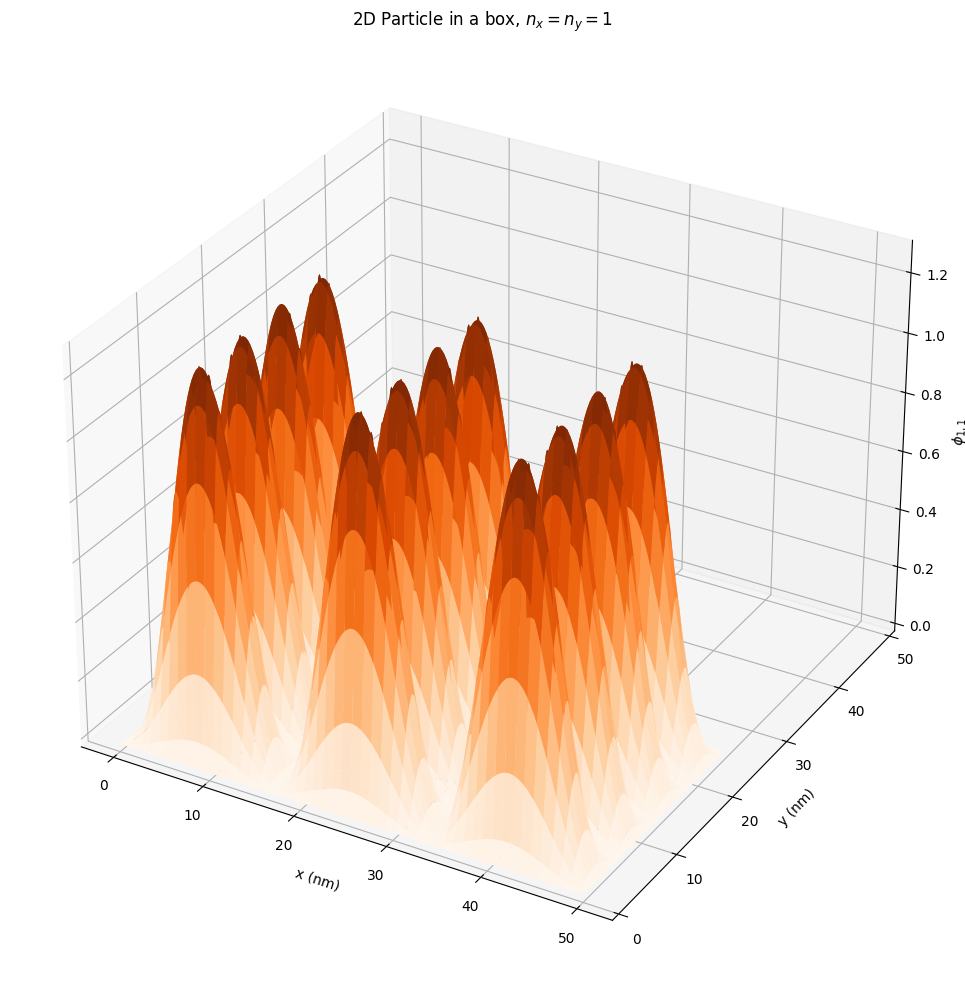

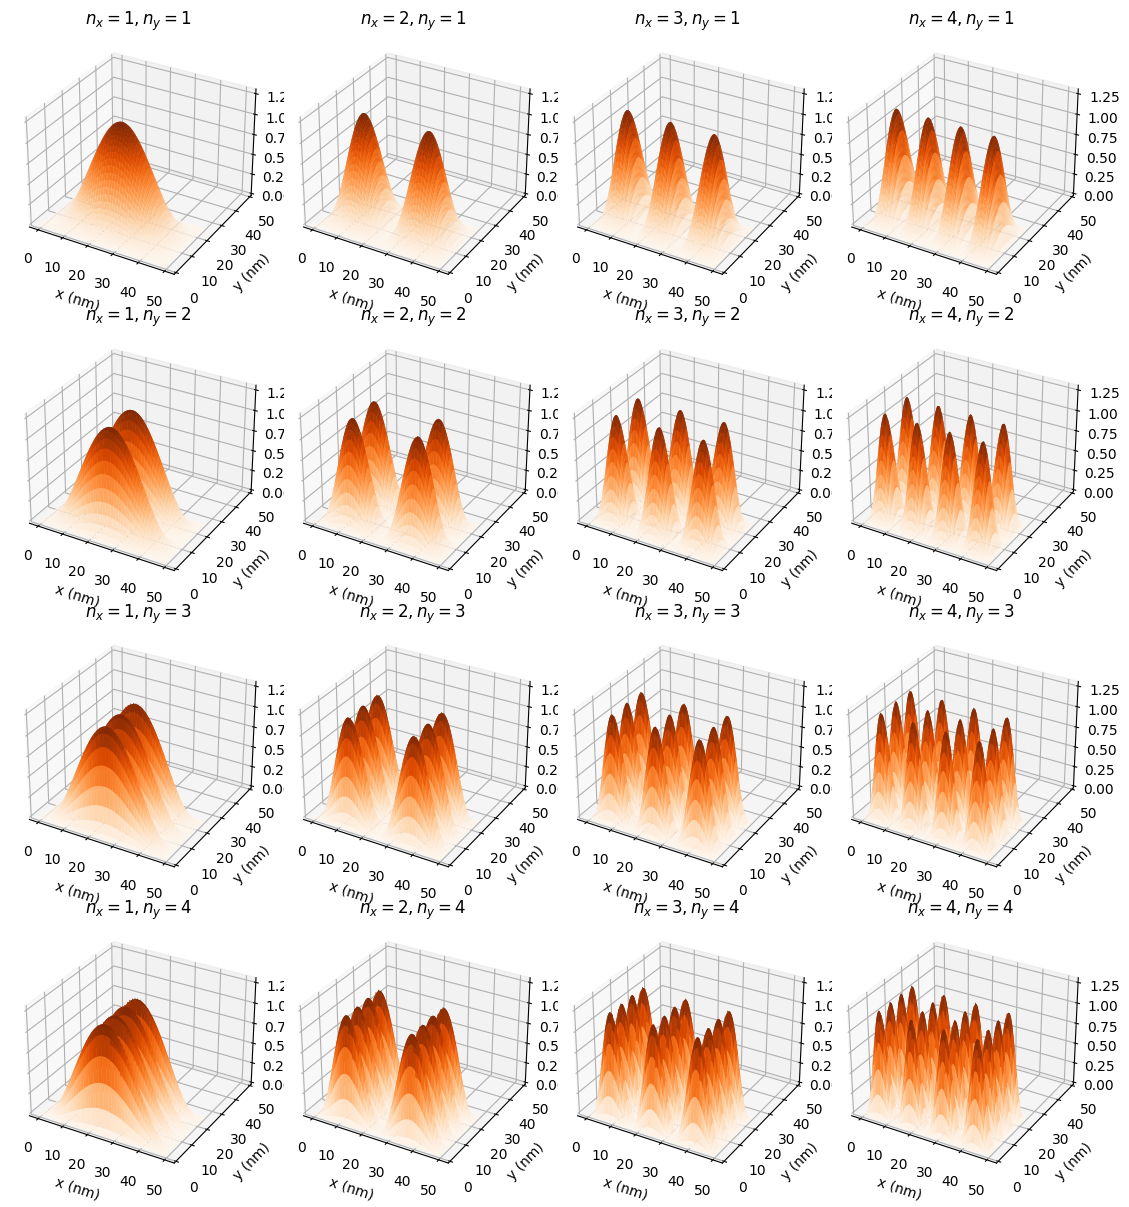

In [169]:
L_x = 50e-9
n_x = 3

L_y = 25e-9
n_y = 4
x = np.linspace(0, L_x, 200)
y = np.linspace(0, L_y, 200)
x, y = np.meshgrid(x, y)

phi = np.sqrt(4/(L_x**2+L_y**2))*np.sin((n_x*np.pi*x)/L_x)*np.sin((n_y*np.pi*y)/L_y)
prob = phi**2

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x*1e9, y*1e9, prob, cmap = "Oranges")
ax.set_title("2D Particle in a box, $n_x=n_y=1$")
ax.set_xlabel("x (nm)")
ax.set_ylabel("y (nm)")
ax.set_zlabel("$\phi_{1, 1}$")
ax.figure.tight_layout()
ax.set_ylim(0, L_x*1e9)

fig, axs = plt.subplots(nrows=4, ncols=4, subplot_kw={'projection': '3d'}, figsize=(14, 12))
for i in range(4):
    for j in range(4):
        n_y = i+1
        n_x = j+1
        ax = axs[i, j]
        phi = np.sqrt(4/(L_x**2+L_y**2))*np.sin((n_x*np.pi*x)/L_x)*np.sin((n_y*np.pi*y)/L_y)
        ax.plot_surface(x*1e9, y*1e9, phi**2, cmap = "Oranges")
        ax.set_title(f"$n_x={n_x}, n_y={n_y}$")
        ax.set_xlabel("x (nm)")
        ax.set_ylabel("y (nm)")
        ax.figure.tight_layout()
        ax.set_ylim(0, L_x*1e9)


So the effect on the spatial probability distribution is pretty intuitive. The spikes are elongated in the direction with greater L. Lets take a look at the effect this has on energy. Recall the relevant formula is 
$$E_{n_x, n_y} = \frac{\hbar^2 \pi^2}{2m}\left(\frac{n_x^2}{L_x^2} + \frac{n_y^2}{L_y^2}\right)$$

Start by making a figure that plots energy along the y axis. Add flat horizontal lines at the energy values for different combinations of $n_x$ and $n_y$, with both ranging from 1 to 4. How many lines to do you see?

Text(0.5, 1.0, '$L_x = 50.0\\ nm, L_y = 50.0\\  nm$')

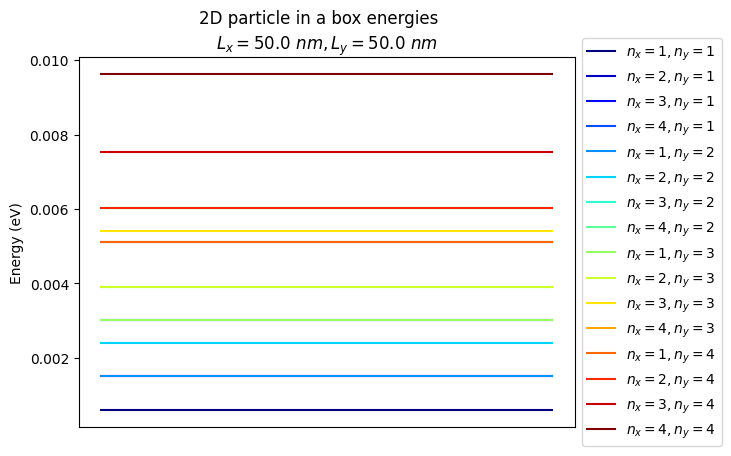

In [170]:
Lx = 50e-9

Ly = 50e-9

Es = np.zeros(16)
plt.figure()
# colors = plt.cm.get_cmap('tab10', 2)
colors = plt.cm.jet(np.linspace(0,1,16))
k = 0
for i in range(4):
    for j in range(4):
        nx = j+1
        ny = i+1
        E = ((np.pi**2*hbar**2)/me)*((nx/Lx)**2 + (ny/Ly)**2) 
        Es[k] = E/e #Convert to eV 
        plt.plot(np.linspace(-5, 5, 10), Es[k]*np.ones(10), label = f"$n_x = {nx}, n_y = {ny}$", c = colors[k])
        k+=1
        plt.xticks([])
        plt.ylabel("Energy (eV)")
        

# plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.suptitle("2D particle in a box energies")
plt.title(f"$L_x = {Lx*1e9}\ nm, L_y = {Ly*1e9}\  nm$")

If you counted correctly, you should see 10 lines. But we expected to se 16, as thats the total number of possible ways to combine $n_x \in [1, 4]$ and $n_y \in [1, 4]$. What gives? What we are seeing is the concept of degeneracy, which is when two states with different quantum numbers (in this case $n_x$  and $n_y$) have the same energy. To see why, just look again at the expression for energy. We have $L_x=L_y$, so we can write
$$E_{n_x, n_y} = \frac{\hbar^2 \pi^2}{2mL^2}\left(n_x^2 + n_y^2\right)$$
Now, if you plug in for example 1 and 2, 
$$E_{n_x=1, n_y=2} = \frac{\hbar^2 \pi^2}{2mL^2}\left(1^2 + 2^2\right) = E_{n_x=2, n_y=1} = \frac{\hbar^2 \pi^2}{2mL^2}\left(2^2 + 1^2\right) = \frac{5\hbar^2 \pi^2}{2mL^2}$$

But, what happens if we make the box non-symmetric again? Change one of your Ls and remake the above plot. 

Text(0.5, 1.0, '$L_x = 50.0\\ nm, L_y = 20.0\\  nm$')

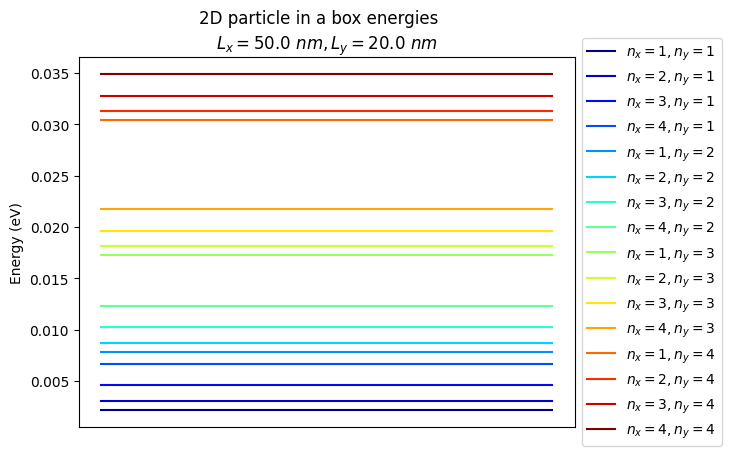

In [171]:
Lx = 50e-9

Ly = 20e-9

Es = np.zeros(16)
plt.figure()
# colors = plt.cm.get_cmap('tab10', 2)
colors = plt.cm.jet(np.linspace(0,1,16))
k = 0
for i in range(4):
    for j in range(4):
        nx = j+1
        ny = i+1
        E = ((np.pi**2*hbar**2)/me)*((nx/Lx)**2 + (ny/Ly)**2) 
        Es[k] = E/e #Convert to eV 
        plt.plot(np.linspace(-5, 5, 10), Es[k]*np.ones(10), label = f"$n_x = {nx}, n_y = {ny}$", c = colors[k])
        k+=1
        plt.xticks([])
        plt.ylabel("Energy (eV)")
        

# plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.suptitle("2D particle in a box energies")
plt.title(f"$L_x = {Lx*1e9}\ nm, L_y = {Ly*1e9}\  nm$")

If you count the lines again, you should get 16. By removing the symmetry of our confinement, we broke our degeneracy!

## Section 3 - Superpositions of Stationary States
We've talked about how superposition is one of the special features of quantum mechanics that quantum computers make use of before. Here's your chance to see it in action! Recall that stationary states are states that have well-defined energies and time independent probability distributsions. It turns out that any general wavefunction for a particle in a box can be decomposoed as a sum of stationary states:
$$\Psi(x, t) = \sum_{n=1}^{\infty} a_n \phi_n(x) e^{-i\frac{E_n}{\hbar}t}$$
The $e^{-i\frac{E_n}{\hbar}t}$ factor comes from our time solution after performing seperation of variables on the time dependent Schrodinger Equation. The probability of measuring any one state is $|a_n|^2$, and we also must enforce $\sum_n |a_n|^2 = 1$ in order to have a properly normalized distribution. In general, the probability distribution of this $\Psi(x, t)$ will have a time dependence. To see why, lets take a simple example of a $\Psi$ that is comprised of two stationary states:
$$\Psi(x, t) = \frac{1}{\sqrt{2}}\phi_2(x)e^{-i\frac{E_2}{\hbar}t} + \frac{1}{\sqrt{2}}\phi_3(x)e^{-i\frac{E_3}{\hbar}t}$$

$$\Rightarrow \Psi^*(x, t)\Psi(x, t) = \left[\frac{1}{\sqrt{2}}\phi_2(x)e^{i\frac{E_2}{\hbar}t} + \frac{1}{\sqrt{2}}\phi_3(x)e^{i\frac{E_3}{\hbar}t}\right]\left[\frac{1}{\sqrt{2}}\phi_2(x)e^{-i\frac{E_2}{\hbar}t} + \frac{1}{\sqrt{2}}\phi_3(x)e^{-i\frac{E_3}{\hbar}t}\right]$$
$$ = \frac{1}{2}\phi_2(x)^2 + \frac{1}{2}\phi_3(x)^2 + \frac{1}{2}\phi_2(x)\phi_3(x)\left(e^{i\frac{(E_2-E_3)}{\hbar}t} + e^{-i\frac{(E_2-E_3)}{\hbar}t}\right) $$

$$ = \frac{1}{2}\phi_2(x)^2 + \frac{1}{2}\phi_3(x)^2 + \phi_2(x)\phi_3(x)\cos\left(\frac{E_2-E_3}{\hbar}t\right) $$

Compare this to just a single stationary state: 
$$\mathbb{P}(x) = \Psi^*\Psi = \left( \sqrt{\frac{2}{L}}\sin\left(\frac{n\pi x}{L}\right)e^{i\frac{E_n}{\hbar}t}\right)\left(\sqrt{\frac{2}{L}}\sin\left(\frac{n\pi x}{L}\right)e^{-i\frac{E_n}{\hbar}t}\right) = \frac{2}{L}\sin^2\left(\frac{n\pi x}{L}\right)$$

Lets investigate what this might look like. Plot both $\Psi(x, t)$ and $|\Psi(x, t)|^2$ for t=0, and for the above $\Psi(x, t)$. 

Text(0.5, 0.98, 'Superposition of solutions to 1D Particle in a Box')

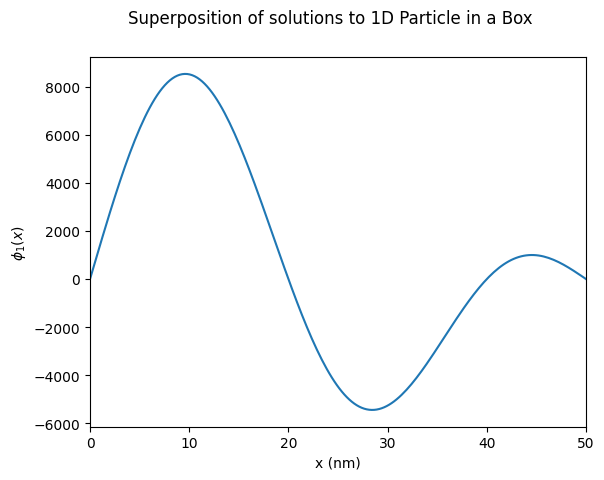

In [172]:
L = 50e-9 # nm
x = np.linspace(0, L, 200)
psi = (1/np.sqrt(2))*(np.sqrt(2/L)*np.sin((2*np.pi*x)/L) + np.sqrt(2/L)*np.sin((3*np.pi*x)/L))

plt.plot(x*1e9, psi)
plt.xlabel("x (nm)")
plt.ylabel("$\phi_1(x)$")

plt.xlim(0, 50)
# plt.ylim(bottom = 0)
plt.suptitle("Superposition of solutions to 1D Particle in a Box")


Text(0.5, 0.98, 'Superposition of solutions to 1D Particle in a Box')

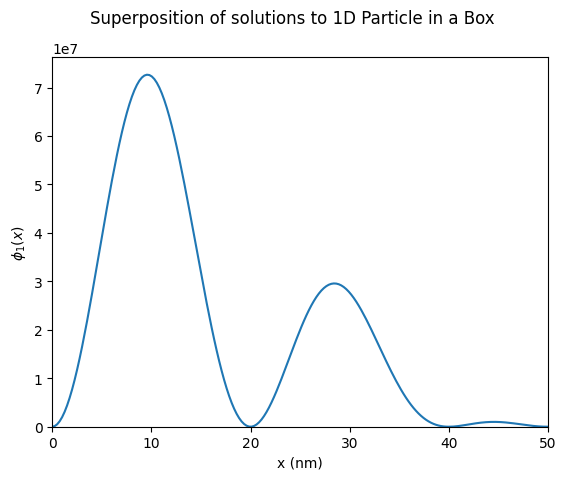

In [173]:
L = 50e-9 # nm
x = np.linspace(0, L, 200)
t = 0
E2 = ((np.pi**2*hbar**2)/me)*(2/L)**2
E3 = ((np.pi**2*hbar**2)/me)*(3/L)**2
psi = (1/np.sqrt(2))*(np.sqrt(2/L)*np.sin((2*np.pi*x)/L)*np.exp(-i*(E2/hbar)*t) + np.sqrt(2/L)*np.sin((3*np.pi*x)/L))*np.exp(-i*(E3/hbar)*t)

prob = np.conj(psi)*psi
plt.plot(x*1e9, prob)
plt.xlabel("x (nm)")
plt.ylabel("$\phi_1(x)$")

plt.xlim(0, 50)
plt.ylim(bottom = 0)
plt.suptitle("Superposition of solutions to 1D Particle in a Box")


Now increment the time a little bit, and again plot both $\Psi(x, t)$ and $|\Psi(x, t)|^2$ for this new value of t. Does the shape change?

c:\Users\walsh\miniconda3\envs\Qiskit\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 0.98, 'Superposition of solutions to 1D Particle in a Box')

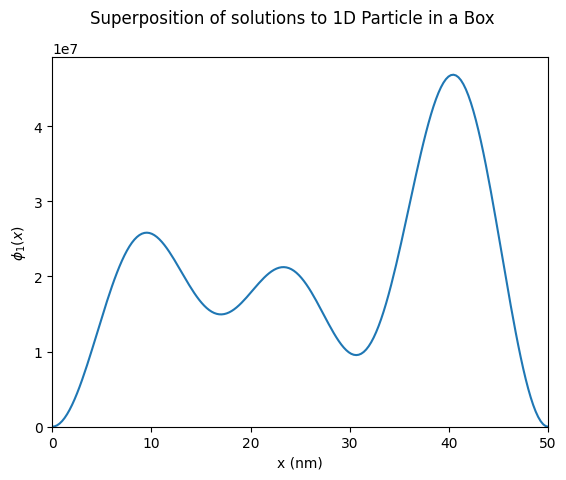

In [174]:
L = 50e-9 # nm
x = np.linspace(0, L, 200)
t = 2
E2 = ((np.pi**2*hbar**2)/me)*(2/L)**2
E3 = ((np.pi**2*hbar**2)/me)*(3/L)**2
psi = (1/np.sqrt(2))*(np.sqrt(2/L)*np.sin((2*np.pi*x)/L)*np.exp(-1j*(E2/hbar)*t) + np.sqrt(2/L)*np.sin((3*np.pi*x)/L))*np.exp(-1j*(E3/hbar)*t)

prob = np.conj(psi)*psi
plt.plot(x*1e9, prob)
plt.xlabel("x (nm)")
plt.ylabel("$\phi_1(x)$")

plt.xlim(0, 50)
plt.ylim(bottom = 0)
plt.suptitle("Superposition of solutions to 1D Particle in a Box")

This concludes the regular guided walkthrough. You are welcome to keep playing around with variables and seeing how the plot changes. In the above example, both coefficients were set to $\frac{1}{\sqrt{2}}$, so that the probability of measuring either state was $1/2$. Play around with these coefficients and the n values for your stationary states to see what the different plots look like for different mixes of states. You can even make $\Psi$ a superposition of 3 or more stationary states. Just remember to normalize ($\sum_n |a_n|^2 = 1$)!

One idea for a more open ended project would be to figure out how to make an animation that shows the probability distribution of $|\Psi|^2$ evolving over time. 

Finally, below is a challenge section that walks you through how to solve Shrodinger's equation in 1d for a periodic potential. 

## Challenge Section - Solving 1D Shrodinger's Equation for a Periodic Potential

# Particle in a periodic potential
# $$H=-\frac{\hbar^2 \nabla^2}{2 m}+U(r)$$
## where $U(r)$ is a periodic function, $U(r)=U(r+R)$
# Bloch's Theorem:
## The eigenstates are plane wave times a periodic function
# $$\psi_{n, k}(r)=e^{i k r} u_{n, k}(r)$$
# $$u_{n, k}(r)=u_{n, k}(r+R)$$
# Proof:
## Fourier transform $U(\boldsymbol{r})=\sum_{K} U_K e^{i K r}, K=2\pi n/R$
$U_{\boldsymbol{K}}=\int d \boldsymbol{r} U(\boldsymbol{r}) e^{-i \boldsymbol{K} \boldsymbol{r}} d \boldsymbol{r} / R$
## Plug in that with ansatz $\psi(\boldsymbol{r})=\sum_{\boldsymbol{P}} c_P e^{i \boldsymbol{P} \boldsymbol{r}}, P=2\pi p/R$
## $$\left(\frac{\hbar^2 p^2}{2 m}-E\right) c_{\boldsymbol{P}}+\sum_{\boldsymbol{K}} U_{\boldsymbol{K}} c_{\boldsymbol{P}-\boldsymbol{K}}=0$$
## $$u_{\boldsymbol{k}}(\boldsymbol{r})=\sum_{\boldsymbol{K}} c_{\boldsymbol{k}-\boldsymbol{K}} e^{-i \boldsymbol{K} \boldsymbol{r}}$$

# Application: Cooper-pair Box qubit
See also https://qiskit-community.github.io/qiskit-metal/tut/4-Analysis/4.34-Transmon-qubit-CPB-hamiltonian-charge-basis.html
![%E5%9B%BE%E7%89%87.png](attachment:%E5%9B%BE%E7%89%87.png)
# $$\mathfrak{L}_{\mathrm{JJ}}=\frac{C_{\mathrm{J}}\left(\dot{\Phi}_1-\dot{\Phi}_2\right)^2}{2}-E_{\mathrm{J}}(1-\cos \phi)$$
## $$\mathfrak{L}_{\mathrm{CPB}}=\frac{C_{\mathrm{g}}\left(\dot{\Phi}-V_{\mathrm{g}}\right)^2}{2}+\frac{C_{\mathrm{J}} \dot{\Phi}^2}{2}-E_{\mathrm{J}}\left[1-\cos \left(\frac{2 \pi \Phi}{\Phi_0}\right)\right]$$

## So the problem effectively become
## $H=-\frac{\hbar^2}{2 m} \frac{d^2}{d x^2}-E_J \cos (2 \pi x / a)$
## Notice that Fourier transform of $\cos$ is just $\cos(\phi)=\left(e^{i \phi}+e^{-i \phi}\right) / 2$
## Plugging in the ansatz gives the following coupled equations
## $\left(4 E_C p^2+E\right) c_p+\frac{E_J}{2}\left(c_{p-1}+c_{p+1}\right)=0, E_C=\frac{4\pi^2\hbar^2}{8 m_e a^2}$
## In matrix form
$$\left(\begin{array}{ccccc}
\ldots & \ldots & & & \\
\ldots & 4 E_C{ }(p-1)^2 & E_J / 2 & & \\
& E_J / 2 & 4 E_C p^2 & E_J / 2 & \\
& & E_J / 2 & 4 E_C(p+1)^2 & \ldots \\
& & & \ldots & \ldots
\end{array}\right)$$

In [175]:
def energies(q, Nmax = 30, EC=0.2, EJ = 40.):
    n_list = [4*EC*(n-q) ** 2 for n in range(-Nmax,Nmax+1)]
    one_list = (2*Nmax)*[-EJ/2]
    H = np.diag(n_list)+np.diag(one_list,k=-1)+np.diag(one_list,k=1)
    evs = LA.eigvalsh(H)
    return evs[:10]

In [176]:
# Construct energy band for the lowest three states:
q_list  = np.linspace(-0.5,0.5,100)
e0_list = []
e1_list = []
e2_list = []
for q in q_list:
    evs = energies(q,EC=1, EJ=1)
    e0_list.append(evs[0])
    e1_list.append(evs[1])
    e2_list.append(evs[2])

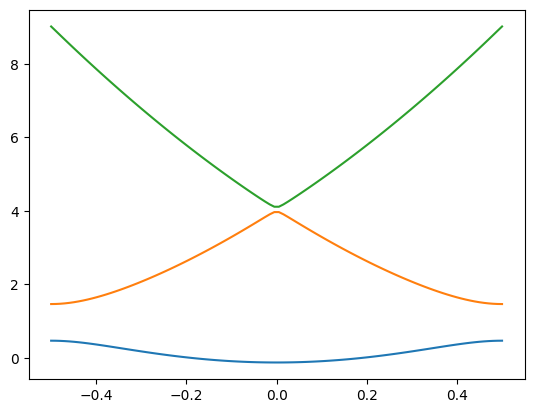

In [177]:
plt.plot(q_list, e0_list)
plt.plot(q_list, e1_list)
plt.plot(q_list, e2_list)
plt.show()

In [178]:
# Here we take k=0.
Nmax = 30
EC = 0.2
EJ = 50
n_list = [4*EC*n ** 2 for n in range(-Nmax,Nmax+1)]
one_list = (2*Nmax)*[-EJ/2]
H = np.diag(n_list)+np.diag(one_list,k=-1)+np.diag(one_list,k=1)
evs, ekets = LA.eigh(H)

In [179]:
def bloch_wf(x, Cvec):
    '''
    x: coordinate where the Bloch function to be evaluated
    Cvec: is an eigenvector of harmonic coefficients c_P(k)
    returns a complex value of the Bloch periodic function
    '''
    u=0
    for n, c in enumerate(Cvec):
        u += c*np.exp(1j*n*x)
    return u

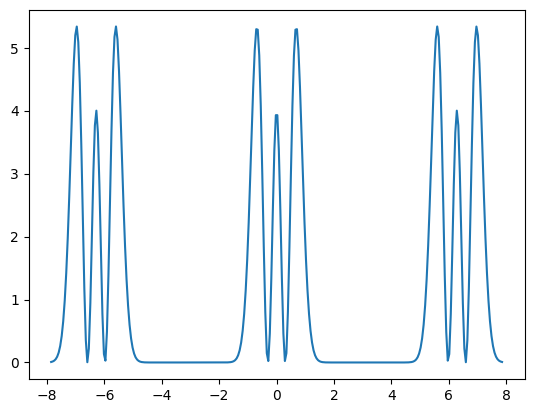

In [180]:
Cvec = ekets[:,2]
x_list = np.linspace(-2.5*np.pi,2.5*np.pi,300)
y_list = []
for x in x_list:
    y_list.append(np.abs(bloch_wf(x,Cvec))**2)
plt.plot(x_list,y_list)
plt.show()